In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

데이터 로드 및 전처리

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [50]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [52]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

print(y_train.shape, y_test.shape)


(60000, 10) (10000, 10)


모델구성

In [70]:
def model_mnist():
    model = Sequential()
    model.add(Conv2D(5, kernel_size=(2,2), input_shape=(28, 28, 1)))   # 27, 27, 6
    model.add(Conv2D(4, (3, 3), activation='relu'))   # 7, 7, 5
    model.add(Conv2D(3, (2, 2), activation='relu'))   # 6, 6, 7
    model.add(Flatten())
    
    model.add(Dense(60))
    model.add(Dropout(0.2))
    model.add(Dense(30))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [71]:
model = model_mnist()
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 27, 27, 5)         25        
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 25, 25, 4)         184       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 3)         51        
_________________________________________________________________
flatten_17 (Flatten)         (None, 1728)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 60)                103740    
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 30)              

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='auto', patience=15, verbose=1, restore_best_weights=True)
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=300, callbacks=[es])

Epoch 1/50
160/160 [==============================] - 6s 37ms/step - loss: 5.9286 - accuracy: 0.7808 - val_loss: 0.7397 - val_accuracy: 0.9165
Epoch 2/50
160/160 [==============================] - 6s 37ms/step - loss: 0.7887 - accuracy: 0.8915 - val_loss: 0.3871 - val_accuracy: 0.9329
Epoch 3/50
160/160 [==============================] - 6s 36ms/step - loss: 0.4082 - accuracy: 0.9155 - val_loss: 0.2486 - val_accuracy: 0.9451
Epoch 4/50
160/160 [==============================] - 5s 34ms/step - loss: 0.2632 - accuracy: 0.9308 - val_loss: 0.2001 - val_accuracy: 0.9492
Epoch 5/50
160/160 [==============================] - 6s 36ms/step - loss: 0.2043 - accuracy: 0.9423 - val_loss: 0.1719 - val_accuracy: 0.9537
Epoch 6/50
160/160 [==============================] - 6s 37ms/step - loss: 0.1644 - accuracy: 0.9509 - val_loss: 0.1550 - val_accuracy: 0.9581
Epoch 7/50
160/160 [==============================] - 6s 36ms/step - loss: 0.1404 - accuracy: 0.9564 - val_loss: 0.1473 - val_accuracy: 0.9595

시각화

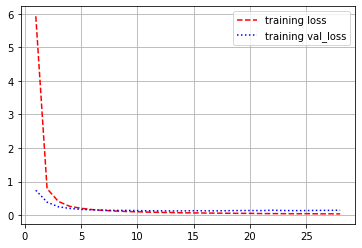

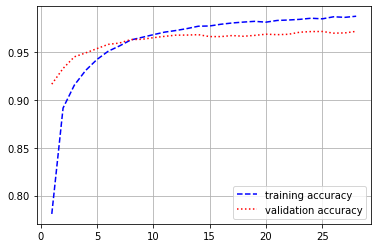

In [73]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r--', label='training loss')
plt.plot(epochs, val_loss, 'b:', label='training val_loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

In [76]:
hist2 = model.evaluate(x_test, y_test)
results = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1189 - accuracy: 0.9682
